In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan
import sklearn.cluster as cluster
from ema_workbench.analysis import prim
%matplotlib inline

/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,5)})


In [3]:
df = pd.read_csv("CodedOutputs/gray_lit_coded.csv")
survey = pd.read_csv("CodedOutputs/survey_coded.csv")

In [4]:
df['Gray']=True
survey['Gray']=False
df = pd.concat([df, survey])

In [5]:
display(df.columns)

Index(['Unnamed: 0', 'All', 'Audience', 'Technical Considerations',
       'Technical Background', 'Stage in Water Process', 'Not Stage Specific',
       'Source Water', 'Potable Water Treatment', 'Potable Water Distribution',
       ...
       'Administrative process', 'Physical contaminents',
       'Possible Contamination Sources', 'Physical properties.1',
       'Water received by the end-user', 'Equipment Maintenance',
       'Environmental Attorneys Lawyers', 'Relevance To environment',
       'To Endvirnment', 'Unnamed: 84'],
      dtype='object', length=110)

In [6]:
df = df.fillna(0)
surveyData = df.drop(['All', 'Audience','Unnamed: 0','Gray','Unnamed: 84'],axis=1)

In [20]:
df

,Unnamed: 0,All,Audience,Technical Considerations,Technical Background,Stage in Water Process,Not Stage Specific,Source Water,Potable Water Treatment,Potable Water Distribution,...,Administrative process,Physical contaminents,Possible Contamination Sources,Physical properties.1,Water received by the end-user,Equipment Maintenance,Environmental Attorneys Lawyers,Relevance To environment,To Endvirnment,Unnamed: 84
0,YRITWC_nd_Aquatic Buffer Ordinance.pdf,local,Governmental or Tribal Officials,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bethel City Council_2020_City's Water & Sewer ...,local,Governmental or Tribal Officials,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AK DEC_2009_Introduction to Small Water System...,federal,Operators-in-training,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AWWA_nd_WSO-WPP-Study Tactics.pdf,state,Operators-in-training,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HUD_2021_Phase 1 Priorities.pdf,federal,Operators-in-training,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,"Interview 5 , April 22",federal,End-Users,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
54,"Interview 6 , April 22",local,Governmental or Tribal Officials,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
55,"Interview 7 , April 22",local,End-Users,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
56,"Interview 8 , April 22",federal,Operators-in-training,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [8]:
surveyData

,Technical Considerations,Technical Background,Stage in Water Process,Not Stage Specific,Source Water,Potable Water Treatment,Potable Water Distribution,Wastewater Collection,Wastewater Treatment,Water Storage,...,Operators,Administrative process,Physical contaminents,Possible Contamination Sources,Physical properties.1,Water received by the end-user,Equipment Maintenance,Environmental Attorneys Lawyers,Relevance To environment,To Endvirnment
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
54,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
56,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [9]:
import umap
reducer  = umap.UMAP(
    n_neighbors=10,
    min_dist=0.0,
    n_components=3,
    random_state=42,
)

/home1/06659/wmobley/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/06659/wmobley/ls6/miniconda3/envs/myenv/lib/python3.9/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [10]:
embedding = reducer.fit_transform(surveyData)
embedding.shape


/work/06659/wmobley/ls6/miniconda3/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(256, 3)

/home1/06659/wmobley/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


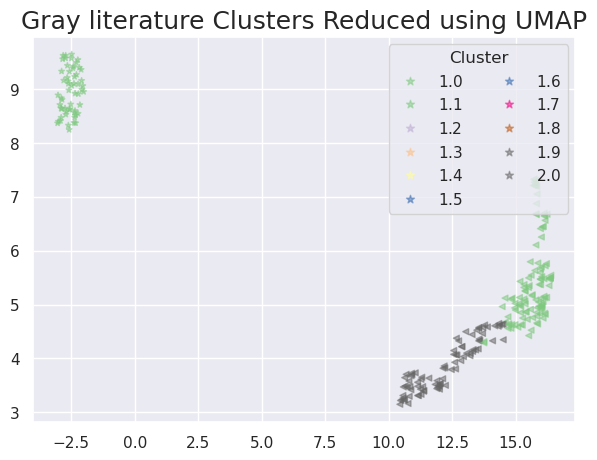

In [11]:
import matplotlib as mpl
import seaborn as sns; sns.set()  # for plot styling
from scipy.spatial import ConvexHull
kmeans_labels = cluster.KMeans(n_clusters=3).fit_predict(embedding)
cmap = mpl.colors.ListedColormap(["#7fc97f", "#beaed4", "#fdc086","#ffff99", "#386cb0","#f0027f", "#bf5b17", "#666666"])
scatter = plt.scatter(embedding[:, 0][df.Gray], embedding[:, 1][df.Gray], c=kmeans_labels[df.Gray],marker="<", s=18,alpha=.5, cmap=cmap);
scatter = plt.scatter(embedding[:, 0][df.Gray==False], embedding[:, 1][df.Gray==False], c=kmeans_labels[df.Gray==False],marker="*",alpha=.5, s=18, cmap=cmap);



plt.legend(*scatter.legend_elements(num=8),ncols=2,
                    loc="upper right", title="Cluster")
plt.title('Gray literature Clusters Reduced using UMAP', fontsize=18);

In [12]:
def PointsInCircum(eachPoint,r,n=100):
    return [(eachPoint[0] + math.cos(2*math.pi/n*x)*r,eachPoint[1] + math.sin(2*math.pi/n*x)*r) for x in range(0,n+1)]


def bufferPoints (inPoints, stretchCoef, n):
    newPoints = []
    for eachPoint in inPoints:
        newPoints += PointsInCircum(eachPoint, stretchCoef, n)
    newPoints = np.array(newPoints)
    newBuffer = ConvexHull (newPoints)

    return newPoints[newBuffer.vertices]


/home1/06659/wmobley/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_611958/758011040.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embedding[:, 0][df.Gray], embedding[:, 1][df.Gray], c="red",marker="<", s=18,alpha=.5, cmap=cmap);
/tmp/ipykernel_611958/758011040.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = plt.scatter(embedding[:, 0][df.Gray==False], embedding[:, 1][df.Gray==False], c="blue",marker="*",alpha=.5, s=18, cmap=cmap);
/tmp/ipykernel_611958/758011040.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence

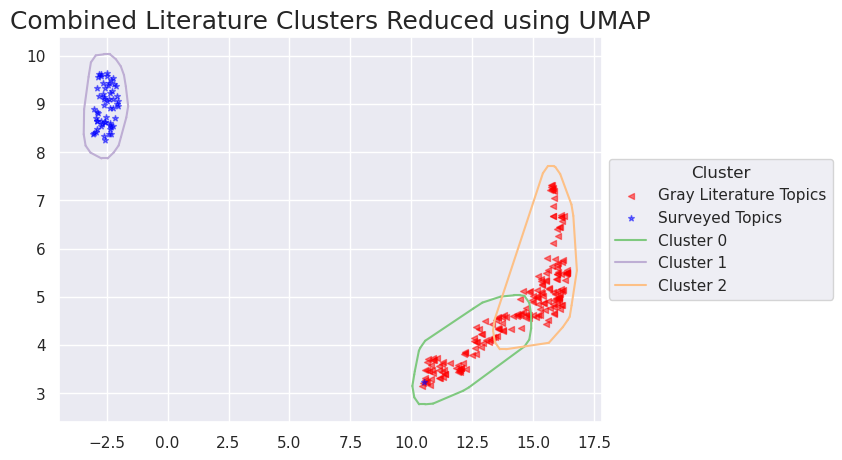

In [13]:
import matplotlib as mpl
import math
n_clusters=3
colors = ["#7fc97f", "#beaed4", "#fdc086","#ffff99", "#386cb0","#f0027f", "#bf5b17", "#666666"][:n_clusters]
kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(embedding)
cmap = mpl.colors.ListedColormap(colors)
scatter = plt.scatter(embedding[:, 0][df.Gray], embedding[:, 1][df.Gray], c="red",marker="<", s=18,alpha=.5, cmap=cmap);
scatter1 = plt.scatter(embedding[:, 0][df.Gray==False], embedding[:, 1][df.Gray==False], c="blue",marker="*",alpha=.5, s=18, cmap=cmap);
for i in np.unique(kmeans_labels):
    stretchCoef =.4
    pointsStretched = bufferPoints (embedding[kmeans_labels==i], stretchCoef, n=10)
    hull = ConvexHull(pointsStretched)
    for ii, simplex in enumerate(hull.simplices):
        scatter = plt.plot(pointsStretched[simplex,0], pointsStretched[simplex,1], 'k-',c=colors[i], label = f"Cluster {ii}")
        labels = ["Gray Literature Topics", "Surveyed Topics", "Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7"][:n_clusters+2]
        leg= plt.legend(labels,
                  ncol=1,  loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster")
hl_dict = {handle.get_label(): handle for handle in leg.legend_handles}
[hl_dict[f'Cluster {i}'].set_color(c) for i, c in enumerate(colors[:n_clusters])]

plt.title('Combined Literature Clusters Reduced using UMAP', fontsize=18);

87 256


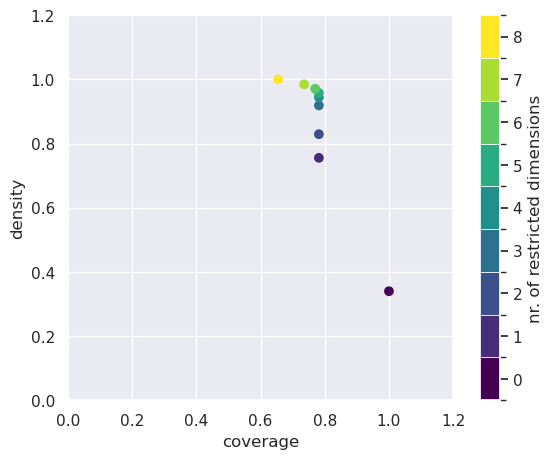

coverage    0.781609
density     0.957746
id          5.000000
mass        0.277344
mean        0.957746
res_dim     5.000000
Name: 5, dtype: float64

                                     box 5                            
                                       min  max qp value      qp value
Effluent at End of Treatment Process   0.0  0.5      NaN  9.218278e-09
Laboratory                             0.0  0.5      NaN  1.452223e-02
Water received by the end-user         0.0  0.5      NaN  1.452223e-02
Hazardous Materials                    0.0  0.0      NaN  2.750075e-01
System Breakdown                       0.0  0.0      NaN  4.390406e-01



[None]

In [14]:
y = kmeans_labels==0
print(sum(y), len(y))

p = prim.Prim(surveyData, y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(5)

57 256


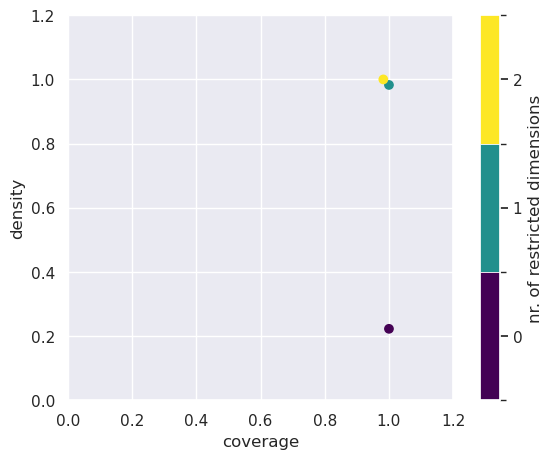

coverage    1.000000
density     0.982759
id          1.000000
mass        0.226562
mean        0.982759
res_dim     1.000000
Name: 1, dtype: float64

                               box 1                            
                                 min  max      qp value qp value
Water received by the end-user   0.5  1.0  2.960529e-36      NaN



[None]

In [16]:
y = kmeans_labels==1
print(sum(y), len(y))

p = prim.Prim(surveyData, y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(1)

112 256


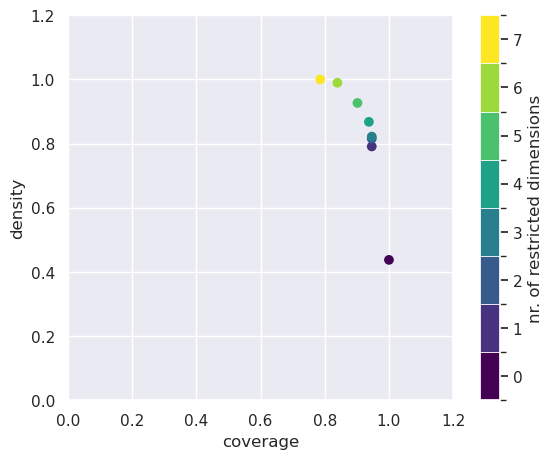

coverage    0.901786
density     0.926606
id          5.000000
mass        0.425781
mean        0.926606
res_dim     5.000000
Name: 5, dtype: float64

                         box 5                        
                           min  max  qp value qp value
Source Water               0.5  1.0  0.006522      NaN
Wastewater Treatment       0.5  1.0  0.039826      NaN
Operating System           0.5  1.0  0.120191      NaN
Technical Considerations   1.0  1.0  0.592615      NaN
Administrative Processes   1.0  1.0  0.592615      NaN



[None]

In [19]:
y = kmeans_labels==2
print(sum(y), len(y))

p = prim.Prim(surveyData, y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(5)

In [ ]:
y = kmeans_labels==3
print(sum(y), len(y))

p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(2)

In [ ]:
y = kmeans_labels==4
print(sum(y))

p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(2)

In [ ]:
y = kmeans_labels==5
print(sum(y), len(y))

p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(3)

In [ ]:
y = kmeans_labels==6
print(sum(y), len(y))

p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(3)

In [ ]:
y = kmeans_labels==7
print(sum(y), len(y))

p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(0)

In [ ]:
df['x']=embedding[:,0] 
df['y']=embedding[:,1] 
df['cluster']=kmeans_labels
df.to_csv("CombinedCluster.csv", index=False)

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=[i for i, f in enumerate(df.file)] ,s=10, cmap='Spectral');